In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [18]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [19]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [28]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
X_test=np.array(X_test)
X_train=np.array(X_train)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [39]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 10s 11ms/step - loss: 0.9663 - accuracy: 0.5298 - val_loss: 0.6283 - val_accuracy: 0.6888
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5747 - accuracy: 0.7419 - val_loss: 0.5223 - val_accuracy: 0.7751
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5132 - accuracy: 0.7791 - val_loss: 0.4870 - val_accuracy: 0.7921
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4841 - accuracy: 0.7884 - val_loss: 0.4667 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.7959 - val_loss: 0.4541 - val_accuracy: 0.8069
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4529 - accuracy: 0.8018 - val_loss: 0.4444 - val_accuracy: 0.8114
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4424 - accuracy: 0.8085 - val_loss: 0.4367 - val_accuracy: 0.81

Epoch 58/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8507 - val_loss: 0.3704 - val_accuracy: 0.8368
Epoch 59/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8515 - val_loss: 0.3704 - val_accuracy: 0.8391
Epoch 60/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8520 - val_loss: 0.3705 - val_accuracy: 0.8360
Epoch 61/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8520 - val_loss: 0.3703 - val_accuracy: 0.8372
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8517 - val_loss: 0.3701 - val_accuracy: 0.8383
Epoch 63/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.8522 - val_loss: 0.3701 - val_accuracy: 0.8387
Epoch 64/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.8517 - val_loss: 0.3701 - val_accuracy:

In [42]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


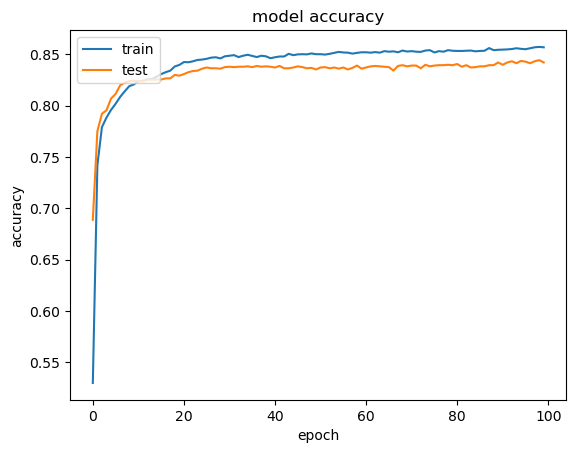

In [45]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

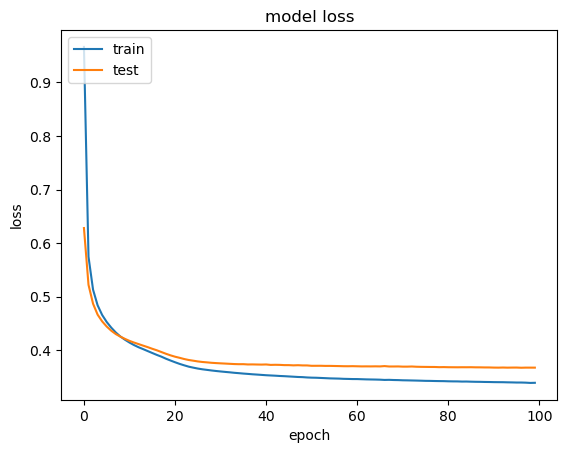

In [46]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


63/63 [==============================] - 0s 1ms/step


In [48]:
score

0.8605